# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from xgboost import XGBClassifier

# Importing the dataset

In [3]:
data = pd.read_csv(r'Parkinsons Train Data.csv', header = 0)
data.head()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,status
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [4]:
data.dtypes

Jitter(local)                          float64
Jitter(local, absolute)                float64
Jitter (rap)                           float64
Jitter (ppq5)                          float64
Jitter (ddp)                           float64
Shimmer (local)                        float64
Shimmer (local, db)                    float64
Shimmer (apq3)                         float64
Shimmer (apq5)                         float64
Shimmer (apq11)                        float64
Shimmer (dda)                          float64
AC                                     float64
NDH                                    float64
HTM                                    float64
Median Pitch                           float64
Mean Pitch                             float64
Standard deviation                     float64
Minimum pitch                          float64
Maximum pitch                          float64
Number of pulses                         int64
Number of periods                        int64
Mean period  

In [20]:
data.shape

(1036, 27)

In [21]:
data.size

27972

In [22]:
data.ndim

2

In [5]:
X = data.loc[:, data.columns != 'status']
y = data.loc[:, 'status']

In [6]:
X

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,14.387,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113
1032,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,7.140,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792
1033,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,13.593,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574
1034,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,...,46.764,90.051,451.366,75,70,0.007257,0.001714,16.667,3,19.575


In [7]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1031    0
1032    0
1033    0
1034    0
1035    0
Name: status, Length: 1036, dtype: int64

# Feature Selection

## Filter

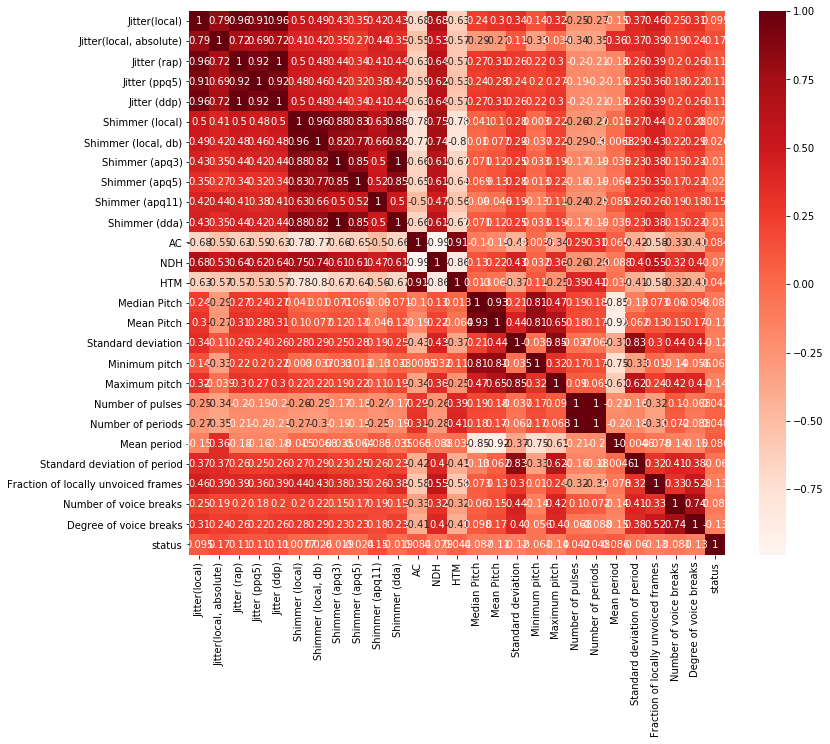

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Correlation with output variable
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

status    1.0
Name: status, dtype: float64

In [8]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                                  0.080735
Jitter(local)                          0.661354
Jitter(local, absolute)                0.011915
Jitter (rap)                           0.700132
Jitter (ppq5)                          0.959838
Jitter (ddp)                           0.700342
Shimmer (local)                        0.836632
Shimmer (local, db)                    0.124726
Shimmer (apq3)                         0.339827
Shimmer (apq5)                         0.584125
Shimmer (apq11)                        0.004223
Shimmer (dda)                          0.339658
AC                                     0.045568
NDH                                    0.261560
HTM                                    0.465409
Median Pitch                           0.625826
Mean Pitch                             0.749314
Standard deviation                     0.481779
Minimum pitch                          0.869224
Maximum pitch                          0.064651
Number of pulses                       0

## If the pvalue is above 0.05 then we remove the feature

In [7]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Jitter(local, absolute)', 'Shimmer (local, db)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'Maximum pitch', 'Number of periods', 'Mean period', 'Fraction of locally unvoiced frames', 'Degree of voice breaks']


## RFE

In [37]:
cols = list(X.columns)
model = XGBClassifier()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
for i in range(26):
    print(cols[i], "----->", rfe.support_[i])

[False  True  True  True False  True False False False  True False False
 False  True  True False  True False  True False  True  True  True  True
 False False]
[ 2  1  1  1 14  1 11  9  5  1 13  6 12  1  1  8  1  4  1  7  1  1  1  1
 10  3]
Jitter(local) -----> False
Jitter(local, absolute) -----> True
Jitter (rap) -----> True
Jitter (ppq5) -----> True
Jitter (ddp) -----> False
Shimmer (local) -----> True
Shimmer (local, db) -----> False
Shimmer (apq3) -----> False
Shimmer (apq5) -----> False
Shimmer (apq11) -----> True
Shimmer (dda) -----> False
AC -----> False
NDH -----> False
HTM -----> True
Median Pitch -----> True
Mean Pitch -----> False
Standard deviation -----> True
Minimum pitch -----> False
Maximum pitch -----> True
Number of pulses -----> False
Number of periods -----> True
Mean period -----> True
Standard deviation of period -----> True
Fraction of locally unvoiced frames -----> True
Number of voice breaks -----> False
Degree of voice breaks -----> False


In [170]:
#no of features
nof_list=np.arange(1,30 )            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)
    from sklearn.preprocessing import StandardScaler
    standard_X = StandardScaler()
    #standard_X = standard_X.fit(X_train)
    #X_train = standard_X.transform(X_train)
    #X_test = standard_X.transform(X_test)
    X_train = standard_X.fit_transform(X_train)
    X_test = standard_X.transform(X_test)
    model = XGBClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 17
Score with 17 features: 0.701923


In [171]:
cols = list(X.columns)
model = XGBClassifier()
#Initializing RFE model
rfe = RFE(model, 17)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)',
       'Jitter (ppq5)', 'Shimmer (local)', 'Shimmer (apq5)', 'Shimmer (apq11)',
       'HTM', 'Median Pitch', 'Standard deviation', 'Minimum pitch',
       'Maximum pitch', 'Number of periods', 'Mean period',
       'Standard deviation of period', 'Fraction of locally unvoiced frames',
       'Degree of voice breaks'],
      dtype='object')


In [43]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3255627904370044, tolerance: 0.019393719806763292
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48541319063750166, tolerance: 0.019393719806763292
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5430257705720578, tolerance: 0.019393719806763292
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2767468651847196, tolerance: 0.020724969843184556
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5782062887604695, tolerance: 0.020724969843184556
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7345085127289508, tolerance: 0.020724969843184556
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.40320239919628875, tolerance: 0.01943281061519904
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.945803950670836, tolerance: 0.01943281061519904
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.27967261637923, tolerance: 0.01943281061519904
  tol, rng, random, positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

Best alpha using built-in LassoCV: 0.039925
Best score using built-in LassoCV: 0.109101


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.14470634496209, tolerance: 0.025900000000000003
  positive)


In [44]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

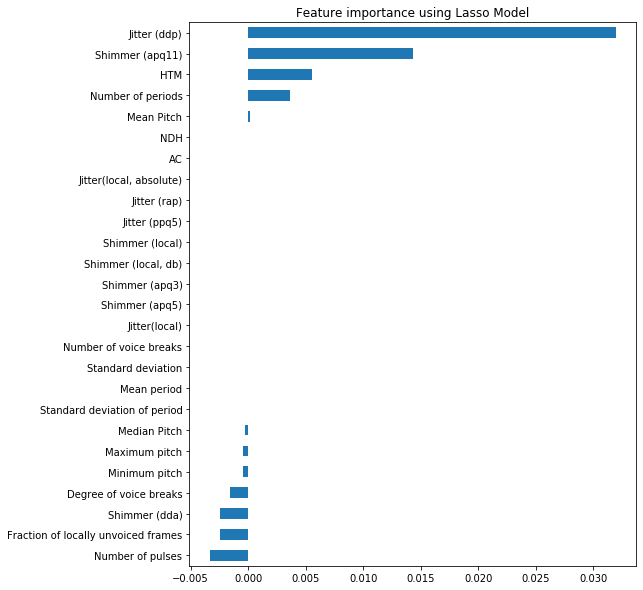

In [45]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [8]:
data_final=data.columns.values.tolist()

In [9]:
data_final.remove('status')

In [10]:
X=[i for i in data_final if i in selected_features_BE]

In [11]:
X

['Jitter(local, absolute)',
 'Shimmer (local, db)',
 'Shimmer (apq11)',
 'Shimmer (dda)',
 'AC',
 'Maximum pitch',
 'Number of periods',
 'Mean period',
 'Fraction of locally unvoiced frames',
 'Degree of voice breaks']

In [104]:
lasso_features = ['Jitter (ddp)', 'Shimmer (apq11)','HTM', 'Number of periods','Mean Pitch','Median Pitch','Minimum pitch', 'Maximum pitch',
                 'Degree of voice breaks','Shimmer (dda)', 'Fraction of locally unvoiced frames', 'Number of pulses' ]

In [12]:
X = data[selected_features_BE]

In [105]:
X = data[lasso_features]

In [13]:
X

,"Jitter(local, absolute)","Shimmer (local, db)",Shimmer (apq11),Shimmer (dda),AC,Maximum pitch,Number of periods,Mean period,Fraction of locally unvoiced frames,Degree of voice breaks
0,0.000090,0.779,6.802,13.551,0.905905,187.576,159,0.006065,0.000,0.000
1,0.000038,0.642,7.194,6.175,0.951285,234.505,169,0.005181,2.247,0.000
2,0.000074,0.875,7.548,13.040,0.911508,211.442,1427,0.006071,10.656,0.178
3,0.000123,1.273,16.779,15.789,0.901302,220.230,92,0.004910,0.000,0.000
4,0.000167,1.040,12.823,9.307,0.856907,225.162,114,0.004757,18.182,13.318
...,...,...,...,...,...,...,...,...,...,...
1031,0.000398,0.965,8.303,13.780,0.754472,158.591,60,0.007766,24.194,15.113
1032,0.000133,0.740,11.928,8.160,0.880775,143.797,44,0.007561,46.053,25.792
1033,0.000226,1.456,14.239,19.300,0.883146,149.641,77,0.007767,20.000,4.574
1034,0.000275,1.367,18.818,19.123,0.765474,451.366,70,0.007257,16.667,19.575


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [15]:
X_train

,"Jitter(local, absolute)","Shimmer (local, db)",Shimmer (apq11),Shimmer (dda),AC,Maximum pitch,Number of periods,Mean period,Fraction of locally unvoiced frames,Degree of voice breaks
787,0.000239,2.414,13.574083,77.459,0.599295,391.130,33,0.005311,49.206,34.322
438,0.000200,1.272,9.511000,12.272,0.813926,142.679,60,0.007648,36.620,14.037
913,0.000049,0.467,2.902000,5.994,0.948956,219.945,57,0.004819,47.170,0.000
142,0.000090,1.640,25.529000,14.023,0.921392,135.676,23,0.007521,0.000,0.000
298,0.000424,1.333,4.583000,13.540,0.804306,159.793,23,0.007177,6.250,0.000
...,...,...,...,...,...,...,...,...,...,...
418,0.000033,0.290,2.186000,4.226,0.986677,167.700,122,0.006402,1.282,0.000
473,0.000271,1.231,16.876000,17.312,0.859304,257.478,45,0.005528,47.170,0.000
49,0.000078,0.609,7.725000,6.568,0.976609,139.455,59,0.007471,0.000,0.000
278,0.000082,0.687,6.824000,11.031,0.935919,156.698,68,0.006713,0.000,0.000


In [16]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()
#standard_X = standard_X.fit(X_train)
#X_train = standard_X.transform(X_train)
#X_test = standard_X.transform(X_test)
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.transform(X_test)

In [17]:
X_train

array([[ 0.60561311,  2.88991496,  0.21770579, ..., -0.68694879,
         1.01620624,  1.45599347],
       [ 0.25633198,  0.18888537, -0.4475195 , ...,  0.5687265 ,
         0.41873674,  0.11332905],
       [-1.12670932, -1.71508032, -1.5295731 , ..., -0.95091431,
         0.91955536, -0.81578016],
       ...,
       [-0.86406027, -1.3792255 , -0.73993102, ...,  0.47324681,
        -1.31964978, -0.81578016],
       [-0.82439037, -1.19474187, -0.88744657, ...,  0.0664928 ,
        -1.31964978, -0.81578016],
       [ 1.16455588, -0.31489686, -0.11679651, ...,  0.23668828,
        -0.1328758 ,  0.70831108]])

In [18]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
score = model.score(X_test, y_test)
print(score)

0.6971153846153846


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classfications Results")
print(classification_report(y_test, y_pred))

print("Accuracy Score")
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[71 35]
 [28 74]]


Classfications Results
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       106
           1       0.68      0.73      0.70       102

    accuracy                           0.70       208
   macro avg       0.70      0.70      0.70       208
weighted avg       0.70      0.70      0.70       208

Accuracy Score
0.6971153846153846


In [22]:
import pandas as pd
pred_data = pd.read_csv(r'Parkinsons Test Data.csv', header=0)
pred_data=pred_data.dropna()
print(pred_data.shape)
print(list(pred_data.columns))
pred_data.head()

(168, 26)
['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks']


,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,...,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,...,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0
2,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,...,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0
3,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,...,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0
4,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,...,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0


In [23]:
pred_X = pred_data[selected_features_BE]

In [117]:
pred_X = pred_data[lasso_features]

In [24]:
pred_X = standard_X.transform(pred_X)

In [25]:
pred_X

array([[-1.50402008, -2.39861583, -1.74667146, ..., -0.65608922,
        -1.31964978, -0.81578016],
       [-1.50584314, -2.56654324, -1.8583314 , ..., -0.86019402,
        -1.31964978, -0.81578016],
       [-1.49763935, -2.54289149, -1.83819332, ..., -0.88586826,
        -1.31964978, -0.81578016],
       ...,
       [-1.3016598 , -1.52113599, -1.150224  , ...,  0.10484571,
        -1.31964978, -0.81578016],
       [-1.29072141, -1.55188326, -1.20163342, ...,  0.01020553,
        -1.31964978, -0.81578016],
       [-1.29072141, -1.20656774, -0.97749491, ..., -0.0619294 ,
        -1.31964978, -0.81578016]])

In [27]:
#pred_y = model.predict(pred_X)
pred_prob_y = model.predict_proba(pred_X)
res = pd.DataFrame(pred_prob_y)
res.columns = ["probability"]
res.to_csv("Probabitlity Predictions.csv")

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [28]:
pred_prob_y

array([[0.73877203, 0.26122797],
       [0.8078678 , 0.19213219],
       [0.8059699 , 0.19403012],
       [0.8059699 , 0.19403012],
       [0.8059699 , 0.19403012],
       [0.80427235, 0.19572766],
       [0.6029355 , 0.3970645 ],
       [0.40411007, 0.5958899 ],
       [0.34416372, 0.6558363 ],
       [0.31330472, 0.6866953 ],
       [0.31330472, 0.6866953 ],
       [0.29170883, 0.7082912 ],
       [0.30657244, 0.69342756],
       [0.24066609, 0.7593339 ],
       [0.22079825, 0.77920175],
       [0.501307  , 0.49869296],
       [0.5015511 , 0.4984489 ],
       [0.2591244 , 0.7408756 ],
       [0.643176  , 0.35682398],
       [0.42571104, 0.57428896],
       [0.2602079 , 0.7397921 ],
       [0.65447056, 0.34552944],
       [0.48777807, 0.51222193],
       [0.5521068 , 0.4478932 ],
       [0.60582256, 0.39417744],
       [0.74356127, 0.25643873],
       [0.5082654 , 0.49173462],
       [0.5212091 , 0.4787909 ],
       [0.7991554 , 0.20084457],
       [0.6680739 , 0.33192608],
       [0.